# Eminem lyrics analysis

This notebook analyzes Eminem's lyrics for plagiats in his lyrics.
The objective hereby is to count the frequency of word patterns with a length of 3.

### Process

1. Load data from Csv: Data is stored in a single csv, holding the lyrics of all eminem songs.
2. Preprocessing: Includes casting to lower case, mapping of contractions, removing numbers and punctuation
3. Count frequencies of phrases: First strings holding three words are built, then there frequency is counted
4. Visualize results: A bar chart visualizes the frequency of the text patterns

### Potential improvements:

Just look for patterns between songs, exclude patterns within songs

### Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
import Functions
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ga67xer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ga67xer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ga67xer\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ga67xer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Load data

In [3]:
PATH = "G:\Zeiss\data\ALL_eminem.txt"
df = pd.read_csv(PATH, delimiter='\t', header=None)

In [4]:
df.describe()

,0
count,21711
unique,18127
top,[Eminem:]
freq,134


### Preprocessing

In [6]:
# Cast text to lower case, remove contractions, numbers, punctuations, whitespaces, stopwords and lemmatize
df['text_clean1'] = df[0].apply(Functions.to_lower)
df['text_clean2'] = df['text_clean1'].apply(Functions.main_contraction)
df['text_clean3'] = df['text_clean2'].apply(Functions.remove_numbers)
df['text_clean4'] = df['text_clean3'].apply(Functions.remove_punct)
df['text_clean5'] = df['text_clean4'].apply(Functions.to_strip)
df['text_clean6'] = df['text_clean5'].apply(Functions.remove_stopwords)
df['text_lemma'] = df['text_clean6'].apply(Functions.lemmatize)

In [7]:
df['text_clean5']

0        look i was gonna go easy on you not to hurt yo...
1                 but im only going to get this one chance
2                                  six minutes six minutes
3                           somethings wrong i can feel it
4              six minutes six minutes slim shady youre on
                               ...                        
21706        ha hahha ha ha hah hah i told you i was shady
21707              ha hahha hahha ha hah hahha hahha hahha
21708                          yall didnt wanna believe me
21709                                             im shady
21710                                    and thats my name
Name: text_clean5, Length: 21711, dtype: object

### Phrase frequency

In [8]:
# Create one row per word
single_words = df['text_clean5'].str.extractall('([a-zA_Z]+)')
single_words.columns = ['Word']
single_words = single_words.reset_index(drop=True)

In [17]:
# Create one row with three words
joined_rows = []
length_patterns = 3
for i in range(len(single_words.values)-(length_patterns)):
    joined_text = single_words.values[i][0]
    for j in range(1, length_patterns):
        joined_text += " "
        joined_text += single_words.values[i+j][0]
    joined_rows.append(joined_text)
pattern_df = pd.DataFrame(joined_rows, columns = ["Patterns"])

### Results

Text(0, 0.5, 'Frequency of pattern')

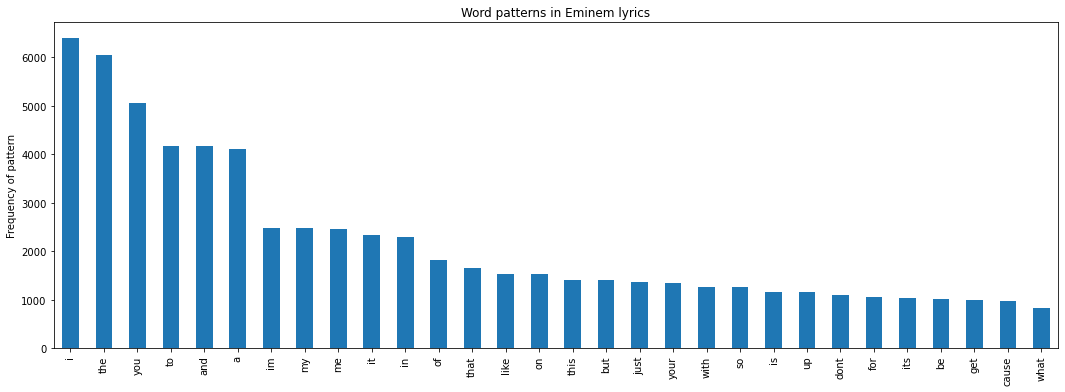

In [15]:
# Count frequency of single words and visualize
word_counts = single_words.value_counts()[:30]
word_counts.index = [str(e[0]) for e in word_counts.index.values]
ax =word_counts.plot.bar(figsize=(18,6), title = "Word patterns in Eminem lyrics")
ax.set_ylabel("Frequency of pattern")

Text(0, 0.5, 'Frequency of pattern')

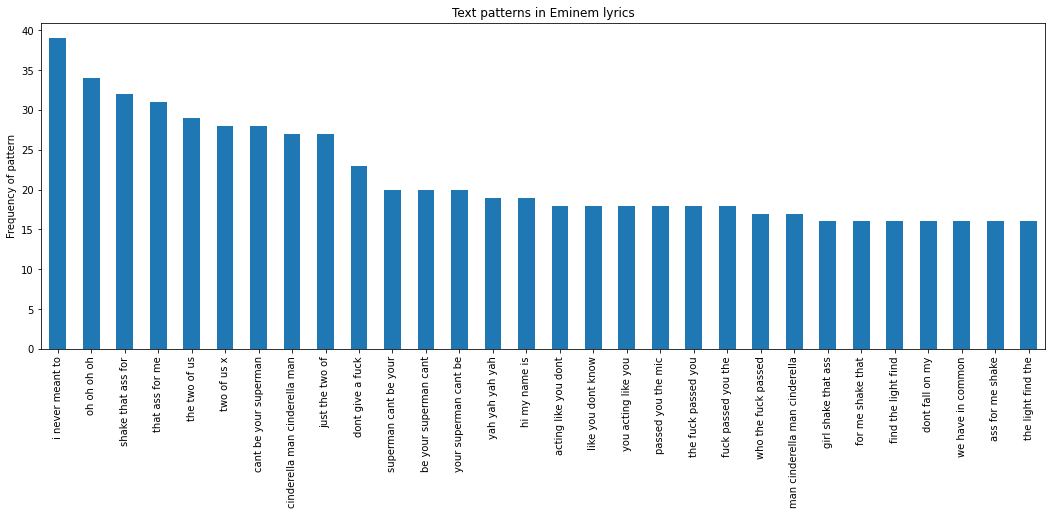

In [16]:
# Count frequency of word patterns and visualize
counts = pattern_df.value_counts()
counts.index = [str(e[0]) for e in pattern_df.value_counts().index.values]
ax = counts[:30].plot.bar( figsize=(18,6), title='Text patterns in Eminem lyrics')
ax.set_ylabel("Frequency of pattern")

### Export for presentation

In [13]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "browser"
counts = counts.sort_values()
fig = go.Figure(go.Bar(x = counts[-10:], y = counts.index[-10:], orientation='h'))
fig.update_layout(template = "simple_white", xaxis_title = "Frequency", yaxis_title = "Word pattern")
fig.show()
fig.write_image("G:\Zeiss\data\Eminem word pattern.svg")

word_counts = word_counts.sort_values()
fig = go.Figure(go.Bar(x = word_counts[-10:], y = word_counts.index[-10:], orientation='h'))
fig.update_layout(template = "simple_white", xaxis_title = "Frequency", yaxis_title = "Words")
fig.show()
fig.write_image("G:\Zeiss\data\Eminem words.svg")
